In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


import os
from PIL import Image


In [2]:
# experiments = pd.DataFrame(columns=['model_arc',  'epochs', 'batch_size', 'final_loss',
#                                     'final_val_loss', 'mean_loss', 'mean_val_loss', 'final_acc',
#                                     'final_val_acc', 'mean_acc', 'mean_val_acc', 'optmizer',
#                                     'learning_rate', 'loss_type'])


# Data

In [3]:
img_dirs_= ['train/angry balanceado','train/neutral balanceado']

imgs= []
label = []


for dire in img_dirs_:
    for img in os.listdir(dire):
        img_path = os.path.join(dire, img)
        img = Image.open(img_path)

        img_array = np.array(img)/ 255
        imgs.append(img_array)
        if dire == 'train/angry balanceado':
            label.append(1) # hate
        else:
            label.append(0) # not hate
         

images = np.array(imgs)
labels = np.array(label)

In [4]:
images.shape

(7900, 48, 48)

In [5]:
images = images.reshape(-1, 48, 48, 1) 
images.shape

(7900, 48, 48, 1)

# Model

In [6]:
learning_rate = 0.0001
adam_optimizer = Adam(learning_rate=learning_rate)
epochs = 10
batch_size = 32

model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),    
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/Users/mateusrico/data-science/venv 15-48-07-293/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), batch_size=batch_size)


Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.5234 - loss: 0.8511 - val_accuracy: 0.4930 - val_loss: 0.7505
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5975 - loss: 0.6706 - val_accuracy: 0.5399 - val_loss: 0.7325
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6194 - loss: 0.6348 - val_accuracy: 0.6133 - val_loss: 0.6521
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6589 - loss: 0.6123 - val_accuracy: 0.6557 - val_loss: 0.6072
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6717 - loss: 0.5843 - val_accuracy: 0.6715 - val_loss: 0.6032
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7166 - loss: 0.5655 - val_accuracy: 0.6753 - val_loss: 0.5871
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7297 - loss: 0.5306 - val_accuracy: 0.6810 - val_loss: 0.5772
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7403 - loss: 0.5120 - val_accu

In [8]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7003 - loss: 0.5752
Validation Accuracy: 70.51%


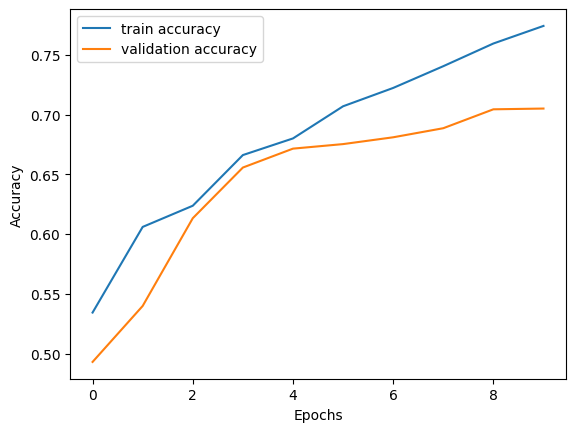

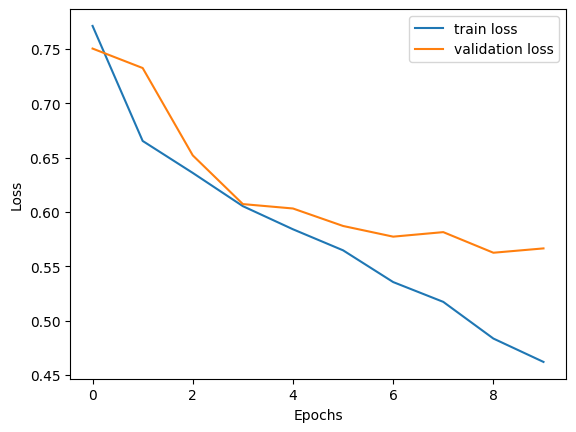

In [9]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('img_loss/'+EXP_NAME+"-training_accuracy.png", dpi=300)  # dpi=300 for high resolution

plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('img_loss/'+EXP_NAME+"-training_loss.png", dpi=300)  # dpi=300 for high resolution
plt.show()


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


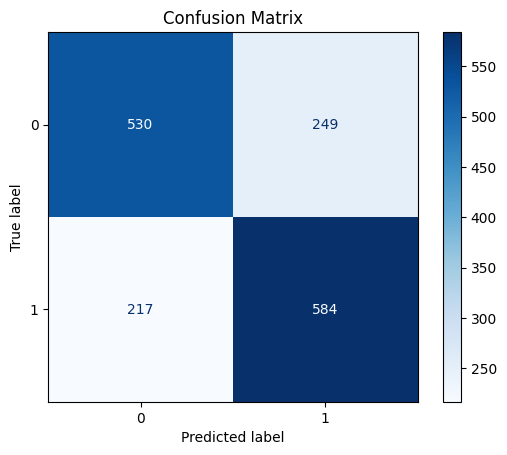

In [10]:
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Save model

In [11]:
# model.save('best_image_model.h5')
